## Рубежный контроль №2 (Вариант 17). Сысоев Александр РТ5-61Б

Для заданного набора данных построить модели регрессии. Для построения моделей использовать методы: дерево решений и градиентный бустинг.

### Импорт библиотек, чтение и основные хар-ки датасета

In [98]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
pd.options.display.float_format = '{:.0f}'.format

In [2]:
data = pd.read_csv('FIFA 2018 Statistics.csv')
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1,90


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [4]:
data.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128,128,128,128,128,128,128,128,128,128,...,128,128,128,128,128,128,94,128,12,12
mean,1,50,13,4,5,3,5,1,15,3,...,463,107,14,2,0,0,39,0,1,46
std,1,10,5,2,2,2,2,1,5,2,...,151,12,5,1,0,0,24,1,0,30
min,0,25,3,0,1,0,0,0,5,0,...,189,80,5,0,0,0,1,0,1,12
25%,0,42,9,2,4,2,3,0,11,1,...,351,101,10,1,0,0,18,0,1,22
50%,1,50,12,4,5,3,5,1,15,2,...,462,104,13,2,0,0,39,0,1,35
75%,2,58,15,5,7,4,6,2,18,4,...,555,109,16,2,0,0,55,0,1,76
max,6,75,26,12,11,10,11,5,26,9,...,1137,148,25,6,1,1,90,4,1,90


In [5]:
data.shape

(128, 27)

<AxesSubplot:>

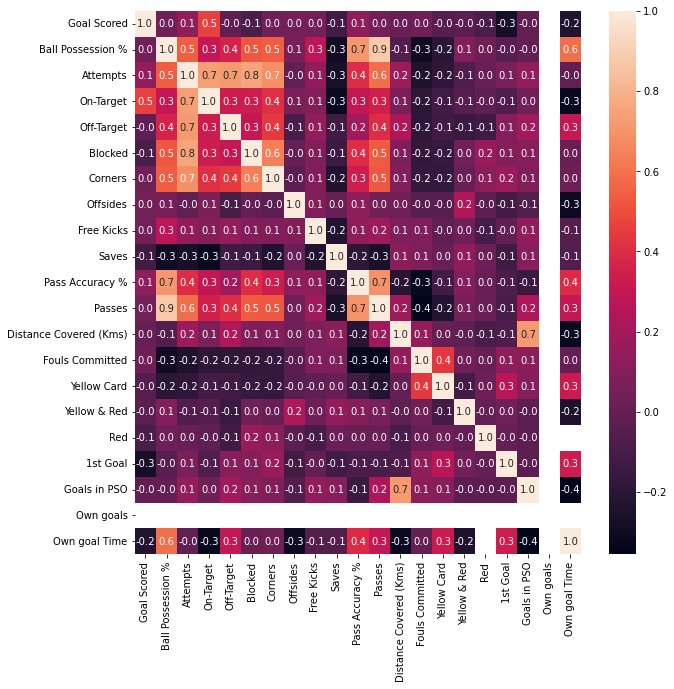

In [100]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.1f')

### Обработка пропусков и кодирование категориальных признаков

In [6]:
data.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [7]:
data_notna = data.fillna(0)

In [8]:
data_notna.isnull().sum()

Date                      0
Team                      0
Opponent                  0
Goal Scored               0
Ball Possession %         0
Attempts                  0
On-Target                 0
Off-Target                0
Blocked                   0
Corners                   0
Offsides                  0
Free Kicks                0
Saves                     0
Pass Accuracy %           0
Passes                    0
Distance Covered (Kms)    0
Fouls Committed           0
Yellow Card               0
Yellow & Red              0
Red                       0
Man of the Match          0
1st Goal                  0
Round                     0
PSO                       0
Goals in PSO              0
Own goals                 0
Own goal Time             0
dtype: int64

In [10]:
data_notna.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

In [11]:
data_notna = data_notna.drop(['Date'], axis=1)

In [20]:
data_ohe = pd.get_dummies(data_notna, columns=['Team', 'Opponent', 'Man of the Match', 'Round', 'PSO'], drop_first=1)
data_ohe

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay,Man of the Match_Yes,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_Yes
0,5,40,13,7,3,3,6,3,11,0,...,0,0,0,1,0,1,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,...,0,0,0,0,0,1,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,...,0,0,1,0,0,1,0,0,0,0
3,1,57,14,4,6,4,5,1,13,3,...,0,0,0,1,0,1,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,...,0,0,0,0,0,0,0,0,1,0
124,2,43,12,4,3,5,4,1,5,5,...,0,0,0,1,0,0,0,0,0,0
125,0,57,15,5,7,3,5,0,12,2,...,0,0,0,0,0,0,0,0,0,0
126,4,39,8,6,1,1,2,1,14,1,...,0,0,0,1,1,0,0,0,0,0


In [21]:
data_ohe = data_ohe.rename(columns = {'Man of the Match_Yes' : 'Man of the Match'})

### Разделение на обучающую и тестовую выборки

In [72]:
features = data_ohe.drop(['Free Kicks'], axis=1)
target = data_ohe['Free Kicks']

In [73]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                             target,
                                                                             test_size=0.25,
                                                                             random_state=1)

In [74]:
print(features_train.shape, features_test.shape)

(96, 89) (32, 89)


In [75]:
print(target_train.shape, target_test.shape)

(96,) (32,)


### Обучение моделей

In [76]:
model_DT = DecisionTreeRegressor(random_state=1, max_depth=10)

In [77]:
model_DT.fit(features_train, target_train)

DecisionTreeRegressor(max_depth=10, random_state=1)

In [78]:
predictions_DT = model_DT.predict(features_test)
print('Decision Tree:', mean_absolute_error(target_test, predictions_DT))

Decision Tree: 5.159375


In [79]:
n_range = np.array(range(1, 11, 2))
tuned_parametrs = [{'max_depth' : n_range}]
tuned_parametrs

[{'max_depth': array([1, 3, 5, 7, 9])}]

In [80]:
tuned_DT = GridSearchCV(DecisionTreeRegressor(random_state=1), tuned_parametrs, cv=5, scoring='neg_mean_absolute_error')
tuned_DT.fit(features, target)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid=[{'max_depth': array([1, 3, 5, 7, 9])}],
             scoring='neg_mean_absolute_error')

In [81]:
tuned_DT.best_params_

{'max_depth': 1}

In [82]:
model_GB = GradientBoostingRegressor(random_state=3)

In [83]:
model_GB.fit(features_train, target_train)

GradientBoostingRegressor(random_state=3)

In [84]:
predictions_GB = model_GB.predict(features_test)
print('Gradient Boosting:', mean_absolute_error(target_test, predictions_GB))

Gradient Boosting: 4.368629742605819


In [85]:
params = {'n_estimators' : [2, 5, 10],
          'learning_rate' : np.linspace(0.1, 0.3, 3),
          'min_samples_split' : np.arange(2, 5, 1),
          'max_depth' : np.arange(1, 5, 1)}

In [86]:
tuned_GB = GridSearchCV(GradientBoostingRegressor(random_state=3), params, scoring='neg_mean_squared_error', cv=5)
tuned_GB.fit(features, target)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=3),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3]),
                         'max_depth': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [87]:
tuned_GB.best_params_

{'learning_rate': 0.1,
 'max_depth': 1,
 'min_samples_split': 2,
 'n_estimators': 2}

In [88]:
tuned_DT.best_estimator_.fit(features_train, target_train)

DecisionTreeRegressor(max_depth=1, random_state=1)

In [89]:
predictions_DT_tuned_train = tuned_DT.best_estimator_.predict(features_train)
predictions_DT_tuned_test = tuned_DT.best_estimator_.predict(features_test)

In [90]:
tuned_GB.best_estimator_.fit(features_train, target_train)

GradientBoostingRegressor(max_depth=1, n_estimators=2, random_state=3)

In [91]:
predictions_GB_tuned_train = tuned_GB.best_estimator_.predict(features_train)
predictions_GB_tuned_test = tuned_GB.best_estimator_.predict(features_test)

### Оценка качества моделей

In [92]:
mae_dict = {}
mse_dict = {}
rmse_dict = {}
mape_dict = {}

In [93]:
mae_dict = {'Gradient boosting' : mean_absolute_error(target_test, predictions_GB_tuned_test),
            'Decision Tree' : mean_absolute_error(target_test, predictions_DT_tuned_test)}
mae_dict

{'Gradient boosting': 4.286108899456522, 'Decision Tree': 4.467730978260869}

In [94]:
mse_dict = {'Gradient boosting' :  mean_squared_error(target_test, predictions_GB_tuned_test),
            'Decision Tree' : mean_squared_error(target_test, predictions_DT_tuned_test)}
mse_dict

{'Gradient boosting': 26.778478639404987, 'Decision Tree': 29.79365917414934}

In [95]:
rmse_dict = {'Gradient boosting' : mean_squared_error(target_test, predictions_GB_tuned_test, squared=False),
             'Decision Tree' : mean_squared_error(target_test, predictions_DT_tuned_test, squared=False)}
rmse_dict

{'Gradient boosting': 5.174792618009439, 'Decision Tree': 5.458356819973328}

In [99]:
mape = {'Gradient boosting' : mean_absolute_percentage_error(target_test, predictions_GB_tuned_test),
           'Decision Tree' : mean_absolute_percentage_error(target_test, predictions_DT_tuned_test)}
mape

{'Gradient boosting': 0.39243440000934615, 'Decision Tree': 0.4012275664521088}

Как видно, градиентный бустинг показал себя лучше, чем дерево решений